In [26]:
# read Gold Bug plain text into string
f = open("data/goldBug.txt", "r")
goldBugString = f.read()
f.close()

In [27]:
import nltk
goldBugTokens = nltk.word_tokenize(goldBugString)
goldBugWordTokens = [word for word in goldBugTokens if any(c.isalpha() for c in word)]
goldBugWordTokensLowercase = [word.lower() for word in goldBugWordTokens]

In [28]:
bugTokens = [word for word in goldBugWordTokens if "bug" in word.lower()]
print("Number of matches ", len(bugTokens))
print("Variant forms: ", set(bugTokens))

Number of matches  38
Variant forms:  {'bug', 'goole-bug', 'goole-bugs', 'GOLD-BUG'}


In [29]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
print("bug: ", stemmer.stem("bug")) # bug
print("bugs: ", stemmer.stem("bugs")) # bug
print("bugging: ", stemmer.stem("bugging")) # bug
print("baking: ", stemmer.stem("baking")) # bake
print("bakery: ", stemmer.stem("bakery")) # bakeri
print("bakeries: ", stemmer.stem("bakeries")) # bakeri

bug:  bug
bugs:  bug
bugging:  bug
baking:  bake
bakery:  bakeri
bakeries:  bakeri


In [30]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
print("bug: ", wnl.lemmatize("bug")) # bug
print("bugs: ", wnl.lemmatize("bugs")) # bug
print("bugging: ", wnl.lemmatize("bugging")) # bugging
print("baking: ", wnl.lemmatize("baking")) # baking
print("bakery: ", wnl.lemmatize("bakery")) # bakery
print("bakeries: ", wnl.lemmatize("bakeries")) # bakery

bug:  bug
bugs:  bug
bugging:  bugging
baking:  baking
bakery:  bakery
bakeries:  bakery


In [31]:
print("baking: ", wnl.lemmatize("baking")) # baking
print("baking: ", wnl.lemmatize("baking", pos="v")) # bake

baking:  baking
baking:  bake


In [32]:
goldBugLemmas = [wnl.lemmatize(word) for word in goldBugWordTokens]

In [33]:
print('Count of "bug" in tokens', goldBugWordTokens.count("bug"))
print('Count of "bugs" in tokens', goldBugWordTokens.count("bugs"))
print('Count of "bug" in lemmas', goldBugLemmas.count("bug"))
print('Count of "eye" in tokens', goldBugWordTokens.count("eye"))
print('Count of "eyes" in tokens', goldBugWordTokens.count("eyes"))
print('Count of "eye" in lemmas', goldBugLemmas.count("eye"))

Count of "bug" in tokens 32
Count of "bugs" in tokens 0
Count of "bug" in lemmas 32
Count of "eye" in tokens 20
Count of "eyes" in tokens 8
Count of "eye" in lemmas 28


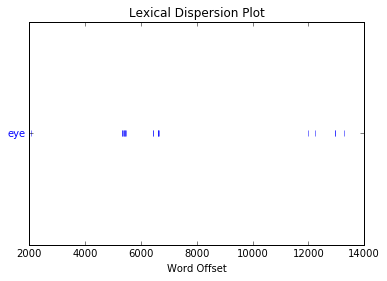

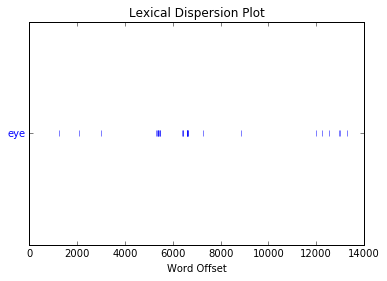

In [34]:
%matplotlib inline
nltk.Text(goldBugWordTokens).dispersion_plot(["eye"]) # first graph with tokens (eye)
nltk.Text(goldBugLemmas).dispersion_plot(["eye"]) # second graph with lemmas (eye and eyes)

In [35]:
from nltk.corpus import wordnet as wn
wn.synsets("bug")

[Synset('bug.n.01'),
 Synset('bug.n.02'),
 Synset('bug.n.03'),
 Synset('hemipterous_insect.n.01'),
 Synset('microbe.n.01'),
 Synset('tease.v.01'),
 Synset('wiretap.v.01')]

In [36]:
wn.synsets("bug", pos="n")

[Synset('bug.n.01'),
 Synset('bug.n.02'),
 Synset('bug.n.03'),
 Synset('hemipterous_insect.n.01'),
 Synset('microbe.n.01')]

In [37]:
for synset in wn.synsets("bug", pos="n"):
    print(synset.name(), ": ", synset.definition())

bug.n.01 :  general term for any insect or similar creeping or crawling invertebrate
bug.n.02 :  a fault or defect in a computer program, system, or machine
bug.n.03 :  a small hidden microphone; for listening secretly
hemipterous_insect.n.01 :  insects with sucking mouthparts and forewings thickened and leathery at the base; usually show incomplete metamorphosis
microbe.n.01 :  a minute life form (especially a disease-causing bacterium); the term is not in technical use


In [38]:
bugSynset = wn.synset("bug.n.01")
print(bugSynset, bugSynset.definition())

Synset('bug.n.01') general term for any insect or similar creeping or crawling invertebrate


In [39]:
bugSynset.hypernyms()

[Synset('insect.n.01')]

In [40]:
bugHypernym = wn.synset("insect.n.01")
print(bugHypernym, bugHypernym.definition())

Synset('insect.n.01') small air-breathing arthropod


In [41]:
bugHypernym.hyponyms()


[Synset('beetle.n.01'),
 Synset('bird_louse.n.01'),
 Synset('bug.n.01'),
 Synset('collembolan.n.01'),
 Synset('defoliator.n.01'),
 Synset('dictyopterous_insect.n.01'),
 Synset('dipterous_insect.n.01'),
 Synset('earwig.n.01'),
 Synset('ephemerid.n.01'),
 Synset('ephemeron.n.01'),
 Synset('flea.n.01'),
 Synset('gallfly.n.03'),
 Synset('hemipterous_insect.n.01'),
 Synset('heteropterous_insect.n.01'),
 Synset('holometabola.n.01'),
 Synset('homopterous_insect.n.01'),
 Synset('hymenopterous_insect.n.01'),
 Synset('imago.n.02'),
 Synset('leaf_miner.n.01'),
 Synset('lepidopterous_insect.n.01'),
 Synset('louse.n.01'),
 Synset('mecopteran.n.01'),
 Synset('neuropteron.n.01'),
 Synset('odonate.n.01'),
 Synset('orthopterous_insect.n.01'),
 Synset('phasmid.n.01'),
 Synset('pollinator.n.01'),
 Synset('proturan.n.01'),
 Synset('psocopterous_insect.n.01'),
 Synset('pupa.n.01'),
 Synset('queen.n.01'),
 Synset('social_insect.n.01'),
 Synset('stonefly.n.01'),
 Synset('termite.n.01'),
 Synset('thysanopter.

In [42]:
insectHyponymsTricky = sorted(set([l.name() for s in bugHypernym.closure(lambda s:s.hyponyms()) for l in s.lemmas()]))
print(insectHyponymsTricky[-50:]) # peek at last 50

['tusser', 'tussock_moth', 'tussore', 'tussur', 'two-spotted_ladybug', 'two-winged_insects', 'tzetze', 'tzetze_fly', 'underwing', 'vedalia', 'velvet_ant', 'vespid', 'vespid_wasp', 'viceroy', 'vinegar_fly', 'walking_leaf', 'walking_stick', 'walkingstick', 'warble_fly', 'wasp', 'water_beetle', 'water_boatman', 'water_bug', 'water_scorpion', 'water_skater', 'water_strider', 'wax_insect', 'wax_moth', 'web_spinner', 'webbing_clothes_moth', 'webbing_moth', 'webworm_moth', 'weevil', 'wheel_bug', 'whirligig_beetle', 'white-faced_hornet', 'white_admiral', 'white_ant', 'whitefly', 'wood_ant', 'woolly_adelgid', 'woolly_alder_aphid', 'woolly_aphid', 'woolly_apple_aphid', 'woolly_plant_louse', 'worker', 'worker_bee', 'yellow-fever_mosquito', 'yellow_hornet', 'yellow_jacket']


In [43]:
def add_five_until_twenty(val):
    val+=5
    if val >= 20: # we have at least 20, so return
        return val
    else: # call this function again
        return add_five_until_twenty(val)

print(add_five_until_twenty(0)) # returns 20

20


In [51]:
def collect_hyponym_lemma_names(synset, hyponym_names):
    for hyponym in synset.hyponyms(): # go through this synset's hyponyms
        for lemma in hyponym.lemmas(): # go through each hyponym's lemma
            hyponym_names.append(lemma.name()) # add this lemma name to our list
        collect_hyponym_lemma_names(hyponym, hyponym_names) # this this hyponym's hyponyms

In [52]:
insect_hyponym_names = [] # this list will keep track of our hyponyns
collect_hyponym_lemma_names(bugHypernym, insect_hyponym_names) # call our function with the bugHypernym
insect_hyponym_names = sorted(set(insect_hyponym_names))
print(insect_hyponym_names[-50:])

['tusser', 'tussock_moth', 'tussore', 'tussur', 'two-spotted_ladybug', 'two-winged_insects', 'tzetze', 'tzetze_fly', 'underwing', 'vedalia', 'velvet_ant', 'vespid', 'vespid_wasp', 'viceroy', 'vinegar_fly', 'walking_leaf', 'walking_stick', 'walkingstick', 'warble_fly', 'wasp', 'water_beetle', 'water_boatman', 'water_bug', 'water_scorpion', 'water_skater', 'water_strider', 'wax_insect', 'wax_moth', 'web_spinner', 'webbing_clothes_moth', 'webbing_moth', 'webworm_moth', 'weevil', 'wheel_bug', 'whirligig_beetle', 'white-faced_hornet', 'white_admiral', 'white_ant', 'whitefly', 'wood_ant', 'woolly_adelgid', 'woolly_alder_aphid', 'woolly_aphid', 'woolly_apple_aphid', 'woolly_plant_louse', 'worker', 'worker_bee', 'yellow-fever_mosquito', 'yellow_hornet', 'yellow_jacket']


In [53]:
def get_hyponym_names_from_hypernym(synset):
    names = []
    for hypernym in synset.hypernyms():
        collect_hyponym_lemma_names(hypernym, names)
    return sorted(set(names))

In [54]:
bug_hypernym_hyponyms = get_hyponym_names_from_hypernym(bugSynset)
print(bugSynset, "has", len(bug_hypernym_hyponyms), "hyponyms")

Synset('bug.n.01') has 886 hyponyms


In [55]:
bugRelatedWords = list(set([word for word in goldBugLemmas if word in bug_hypernym_hyponyms]))
bugRelatedWords

['bug', 'bee', 'soldier', 'beetle', 'scarabaeus']

In [56]:
goldBugText = nltk.Text(goldBugLemmas)
goldBugText.concordance("soldier", 100)

Displaying 1 of 1 matches:
 looking dis here way wid he head down and he soldier up and a white a a gose And den he keep a syp


In [57]:
bugRelatedWordsFiltered = [word for word in bugRelatedWords if "soldier" not in word]
bugRelatedWordsFiltered

['bug', 'bee', 'beetle', 'scarabaeus']

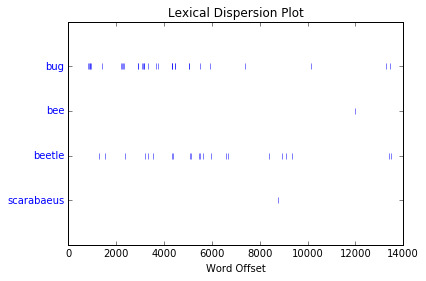

In [58]:
goldBugText.dispersion_plot(bugRelatedWordsFiltered)


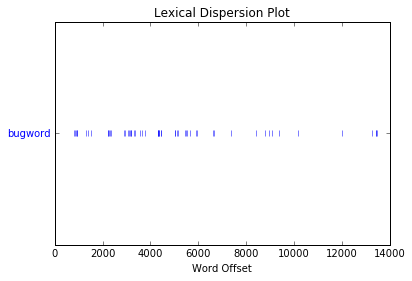

In [59]:
goldBugLemmasForBugs = ["bugword" if word in bugRelatedWordsFiltered else word for word in goldBugLemmas]
goldBugTextForBugs = nltk.Text(goldBugLemmasForBugs)
goldBugTextForBugs.dispersion_plot(["bugword"]) # this plots a composition of bee, scarabaeus, bug and beetle

In [60]:
print(goldBugLemmasForBugs.count("bugword"),goldBugTokens.count("bug"))
goldBugLemmasForBugs.count("bugword") * 100 / goldBugTokens.count("bug")

56 32


175.0

In [61]:
goldBugTextForBugs.similar("bugword")

scarabæus parchment skull tree insect peg whole island hut boat spade
character slip hearth kind solution pit table line scrap


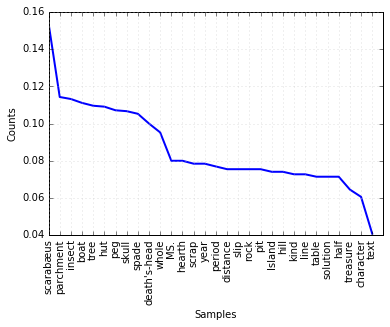

In [62]:
goldBugBugContextIndex = nltk.text.ContextIndex(goldBugLemmasForBugs)
goldBugBugSimilarities = goldBugBugContextIndex.word_similarity_dict("bugword")
del goldBugBugSimilarities['bugword'] # we don't want to include "bugword" itself in our dictionary
goldBugBugSimilarityFreqs = nltk.FreqDist(goldBugBugSimilarities) # copy the dictionary into a FreqDist
goldBugBugSimilarityFreqs.plot(30)

# next steps

What's the count of "bug" in our goldBugWordTokens list and of "bugword" in our goldBugLemmasForBugs list?

In [65]:
print("Number of counts for bug in goldBugWordTokens:", goldBugWordTokens.count("but"))
# well, there's the first half, although that seemed too simple.

Number of counts for bug in goldBugWordTokens: 73


In [69]:
# now, on to the "bugword" in the lemmas list - can I just do the same thing?
print("Number of counts for bugword in our goldBugLemmasForBugs list:", goldBugLemmasForBugs.count("bugword"))
# again, that seems too simple, but the question didn't specify hyponyms or anything, so that's fine I suppose!

Number of counts for bugword in our goldBugLemmasForBugs list: 56


What's the percentage increase in coverage that we get by lemmatizing and looking related words using WordNet?

In [70]:
# first, establish what the coverage was before lemmatizing and WordNet
# I'll just repeat an earlier process
bugTokens = [word for word in goldBugWordTokens if "bug" in word.lower()]
# that should be before all the lemmatization
print("Number of matches ", len(bugTokens))


Number of matches  38


In [76]:
# okay, but I'm curious to see what happens with stemming, but pre-lemma and wordnet
goldStems = [stemmer.stem("bug") for word in goldBugWordTokens]

In [80]:
print("Number of matches ", goldStems.count("bug"))

Number of matches  13639


In [81]:
# ummm. That doesn't look right, even though I tried the following variation too -
print(len(goldStems))

13639


In [82]:
# Well, I guess I can give up on that for now and perhaps come back to that
# if I ever need to. Let's go back to doing the comparison - 
print("Number of matches ", len(bugTokens))

Number of matches  38


In [84]:
# bloo be bloo, already in the code - 
print(goldBugLemmasForBugs.count("bugword"),goldBugTokens.count("bug"))
goldBugLemmasForBugs.count("bugword") * 100 / goldBugTokens.count("bug")

56 32


175.0

What's another word in The Gold Bug where the percentage increase is greater using the same process we followed:
    - choose a word and find the synset that is most relevant to the text's meaning
    - create a list of all the hyponyms of the hypernym of the synset (using our get_hyponym_names_from_hypernym function)
    - replace all occurrences of the hyponyms with a standard word form (we used "bugword" last time)

In [85]:
# the word I choose is "paper"!
paperTokens = [word for word in goldBugWordTokens if "paper" in word.lower()]
print("Number of matches ", len(paperTokens))
print("Variant forms: ", set(paperTokens))


Number of matches  17
Variant forms:  {'paper'}


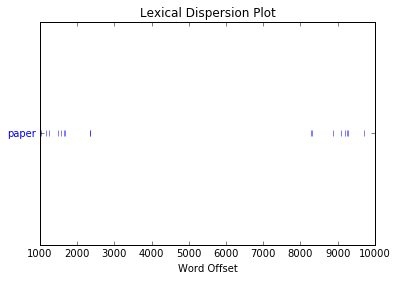

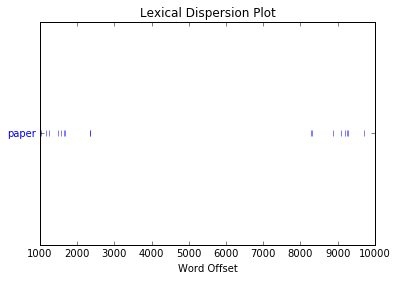

In [86]:
# for fun, I'm going to try doing a dispersion plot with paper
# although I doubt that there will be much change
%matplotlib inline
nltk.Text(goldBugWordTokens).dispersion_plot(["paper"]) # first graph with tokens (eye)
nltk.Text(goldBugLemmas).dispersion_plot(["paper"]) # second graph with lemmas (eye and eyes)

In [87]:
wn.synsets("paper")

[Synset('paper.n.01'),
 Synset('composition.n.08'),
 Synset('newspaper.n.01'),
 Synset('paper.n.04'),
 Synset('paper.n.05'),
 Synset('newspaper.n.02'),
 Synset('newspaper.n.03'),
 Synset('paper.v.01'),
 Synset('wallpaper.v.01')]

In [89]:
wn.synsets("paper", pos="n")

[Synset('paper.n.01'),
 Synset('composition.n.08'),
 Synset('newspaper.n.01'),
 Synset('paper.n.04'),
 Synset('paper.n.05'),
 Synset('newspaper.n.02'),
 Synset('newspaper.n.03')]

In [90]:
# I definitely don't need some of these, so I'll make sure to cut them, but let's check definitions
for synset in wn.synsets("paper", pos="n"):
    print(synset.name(), ": ", synset.definition())

paper.n.01 :  a material made of cellulose pulp derived mainly from wood or rags or certain grasses
composition.n.08 :  an essay (especially one written as an assignment)
newspaper.n.01 :  a daily or weekly publication on folded sheets; contains news and articles and advertisements
paper.n.04 :  a medium for written communication
paper.n.05 :  a scholarly article describing the results of observations or stating hypotheses
newspaper.n.02 :  a business firm that publishes newspapers
newspaper.n.03 :  the physical object that is the product of a newspaper publisher


In [91]:
# first one looks the best!
paperSynset = wn.synset("paper.n.01")
print(paperSynset, paperSynset.definition())

Synset('paper.n.01') a material made of cellulose pulp derived mainly from wood or rags or certain grasses


In [92]:
paperSynset.hypernyms()

[Synset('material.n.01')]

In [93]:
paperHypernym = wn.synset("paper.n.01")
print(paperHypernym, paperHypernym.definition())

Synset('paper.n.01') a material made of cellulose pulp derived mainly from wood or rags or certain grasses


In [94]:
paperHypernym.hyponyms()

[Synset('art_paper.n.01'),
 Synset('blotting_paper.n.01'),
 Synset('blueprint_paper.n.01'),
 Synset('carbon_paper.n.01'),
 Synset('card.n.01'),
 Synset('cardboard.n.01'),
 Synset('cartridge_paper.n.02'),
 Synset('chad.n.01'),
 Synset('computer_paper.n.01'),
 Synset('confetti.n.01'),
 Synset('construction_paper.n.01'),
 Synset('crepe.n.01'),
 Synset('drawing_paper.n.01'),
 Synset('filter_paper.n.01'),
 Synset('flypaper.n.01'),
 Synset('graph_paper.n.01'),
 Synset('greaseproof_paper.n.01'),
 Synset('india_paper.n.01'),
 Synset('linen.n.02'),
 Synset('litmus_paper.n.01'),
 Synset('manifold_paper.n.01'),
 Synset('manila.n.01'),
 Synset('music_paper.n.01'),
 Synset('newspaper.n.04'),
 Synset('oilpaper.n.01'),
 Synset('pad.n.01'),
 Synset('paper_tape.n.01'),
 Synset('paper_toweling.n.01'),
 Synset('papier-mache.n.01'),
 Synset('papyrus.n.01'),
 Synset('parchment.n.01'),
 Synset('rice_paper.n.01'),
 Synset('roofing_paper.n.01'),
 Synset('sheet.n.02'),
 Synset('ticker_tape.n.01'),
 Synset('tis

In [95]:
def collect_hyponym_lemma_names(synset, hyponym_names):
    for hyponym in synset.hyponyms(): 
        for lemma in hyponym.lemmas():
            hyponym_names.append(lemma.name())
        collect_hyponym_lemma_names(hyponym, hyponym_names)

In [99]:
material_hyponym_names = []
collect_hyponym_lemma_names(paperHypernym, material_hyponym_names)
material_hyponym_names = sorted(set(material_hyponym_names))
print(material_hyponym_names[-50:])

['spade', 'sports_page', 'spot', 'spread', 'spread_head', 'spreadhead', 'stamp', 'stationery', 'stopper', 'strawboard', 'style_sheet', 'suit', 'swinging_chad', 'tablet', 'tar_paper', 'tarot', 'tarot_card', 'tear_sheet', 'ten', 'ten-spot', 'three', 'ticker_tape', 'timecard', 'tissue', 'tissue_paper', 'title_page', 'toilet_paper', 'toilet_roll', 'toilet_tissue', 'tracing_paper', 'trading_card', 'transfer_paper', 'trey', 'tri-chad', 'trump', 'trump_card', 'two', 'typewriter_paper', 'typing_paper', 'vellum', 'verso', 'wallpaper', 'waste_paper', 'wax_paper', 'wild_card', 'worksheet', 'wove_paper', 'wrapping_paper', 'writing_pad', 'writing_paper']


In [100]:
paper_hypernym_hyponyms = get_hyponym_names_from_hypernym(paperSynset)
print(paperSynset, "has", len(paper_hypernym_hyponyms), "hyponyms")

Synset('paper.n.01') has 3755 hyponyms


In [102]:
paperRelatedWords = list(set([word for word in goldBugLemmas if word in paper_hypernym_hyponyms]))
paperRelatedWords

['down',
 'preparation',
 'eight',
 'fur',
 'shell',
 'parchment',
 'oak',
 'two',
 'jargon',
 'four',
 'crude',
 'upper',
 'counter',
 'draw',
 'dust',
 'scrap',
 'A',
 'heart',
 'spot',
 'seven',
 'size',
 'base',
 'G',
 'jet',
 'putty',
 'paper',
 'spade',
 'five',
 'sapphire',
 'slip',
 'fell',
 'water',
 'six',
 'vellum',
 'log',
 'nine',
 'rock',
 'ruby',
 'stamp',
 'spread',
 'three',
 'color',
 'emerald',
 'wood',
 'dirt',
 'mould',
 'ground',
 'string',
 'diamond',
 'nitre',
 'thus',
 'soil',
 'kid',
 'charge',
 'quarter',
 'seal',
 'leaf',
 'foolscap',
 'shot',
 'stone',
 'opal',
 'silver',
 'particle',
 'sand',
 'ten',
 'slate',
 'earth',
 'till',
 'stick',
 'signature',
 'chemical',
 'bone']

In [103]:
goldBugText = nltk.Text(goldBugLemmas)
goldBugText.concordance("chemical", 100)

Displaying 1 of 1 matches:
 saw designed upon it You are well aware that chemical preparation exist and have existed time out o


In [104]:
goldBugText = nltk.Text(goldBugLemmas)
goldBugText.concordance("bone", 100)

Displaying 1 of 1 matches:
n a few second he had uncovered a mass of human bone forming two complete skeleton intermingled with


In [108]:
paperLemmas = ["paperword" if word in paperRelatedWords else word for word in goldBugLemmas]

In [113]:
# having the hypernyms is waaaaay too broad.
# I would definitely have to be careful about how to use this in the future.
print(paperLemmas.count("paperword"),goldBugTokens.count("paper"))
paperLemmas.count("paperword") * 100 / goldBugTokens.count("paper")

292 17


1717.6470588235295